# League of Legends 2019 World Championship Analysis

A logistical regression model will be created to determine the most important variables in a victory. The datasets are from Kaggle: https://www.kaggle.com/ilyadziamidovich/league-of-legends-world-championship-2019. 


# Importing relevant libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [2]:
player_data = pd.read_csv('players.csv')
player_data

,Unnamed: 0,date,side,position,player,team,champion,ban1,ban2,ban3,...,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,0,43740.28615,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,...,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1,43740.28615,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,...,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,2,43740.28615,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,...,-629,4751,4533,218,88,85,3,131,150,-19
3,3,43740.28615,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,...,-1829,3526,3532,-6,87,76,11,119,134,-15
4,4,43740.28615,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,...,-1156,2731,2376,355,4,3,1,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1421,43779.39314,Red,Top,Wunder,G2 Esports,Ryze,Pantheon,Qiyana,Rakan,...,692,4330,4611,-281,88,65,23,153,105,48
1186,1422,43779.39314,Red,Jungle,Jankos,G2 Esports,Jarvan IV,Pantheon,Qiyana,Rakan,...,279,2926,2699,227,48,55,-7,80,81,-1
1187,1423,43779.39314,Red,Middle,Caps,G2 Esports,Veigar,Pantheon,Qiyana,Rakan,...,-169,4711,4430,281,89,78,11,129,122,7
1188,1424,43779.39314,Red,ADC,Perkz,G2 Esports,Ezreal,Pantheon,Qiyana,Rakan,...,-1495,3194,3887,-693,71,90,-19,125,151,-26


In [3]:
champion_data = pd.read_csv('champions.csv')
champion_data

,Unnamed: 0,champion,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,...,winrate_30_35_min,matches_35_40_min,win_lose_35_40_min,winrate_35_40_min,matches_40_45_min,win_lose_40_45_min,winrate_40_45_min,matches_more_45_min,win_lose_more_45_min,winrate_more_45_min
0,1,Kai'Sa,71,37,34,52%,30,15,15,50%,...,46%,11,7-Apr,36%,5,2-Mar,60%,1,Jan-00,100%
1,2,Lee Sin,58,30,28,52%,21,11,10,52%,...,45%,10,4-Jun,60%,8,3-May,63%,1,0-1,0%
2,3,Xayah,57,35,22,61%,33,21,12,64%,...,70%,9,6-Mar,33%,5,3-Feb,40%,2,Feb-00,100%
3,4,Nautilus,52,28,24,54%,27,17,10,63%,...,47%,11,4-Jul,64%,5,2-Mar,60%,2,Feb-00,100%
4,5,Gragas,49,32,17,65%,26,16,10,62%,...,59%,7,1-Jun,86%,6,Jun-00,100%,2,1-Jan,50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Viktor,1,0,1,0%,1,0,1,0%,...,0%,0,0-0,0%,0,0-0,0%,0,0-0,0%
94,95,Volibear,1,0,1,0%,1,0,1,0%,...,0%,0,0-0,0%,0,0-0,0%,0,0-0,0%
95,96,Xin Zhao,1,0,1,0%,0,0,0,0%,...,0%,0,0-0,0%,0,0-0,0%,0,0-0,0%
96,97,Ziggs,1,0,1,0%,0,0,0,0%,...,0%,0,0-0,0%,0,0-0,0%,1,0-1,0%


In [7]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
raw_data = pd.merge(left=player_data,right=champion_data,how='left',left_on='champion',right_on='champion')
raw_data

,Unnamed: 0_x,date,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15,Unnamed: 0_y,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side,matches_less_25_min,win_lose_less_25_min,winrate_less_25_min,matches_25_to_30_min,win_lose_25_to_30_min,winrate_25_30_min,matches_30_35_min,win_lose_30_35_min,winrate_30_35_min,matches_35_40_min,win_lose_35_40_min,winrate_35_40_min,matches_40_45_min,win_lose_40_45_min,winrate_40_45_min,matches_more_45_min,win_lose_more_45_min,winrate_more_45_min
0,0,43740.28615,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6,21.0,18.0,11.0,7.0,61%,8.0,7.0,1.0,88%,10.0,4.0,6.0,40%,1.0,Jan-00,100%,4.0,2-Feb,50%,6.0,3-Mar,50%,4.0,Apr-00,100%,2.0,1-Jan,50%,1.0,0-1,0%
1,1,43740.28615,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,2,1,2,0,0,0,1,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7925,298.680904,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17,61.0,5.0,1.0,4.0,20%,3.0,0.0,3.0,0%,2.0,1.0,1.0,50%,0.0,0-0,0%,2.0,1-Jan,50%,0.0,0-0,0%,3.0,0-3,0%,0.0,0-0,0%,0.0,0-0,0%
2,2,43740.28615,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19,33.0,12.0,3.0,9.0,25%,3.0,0.0,3.0,0%,9.0,3.0,6.0,33%,1.0,0-1,0%,4.0,3-Jan,25%,2.0,1-Jan,50%,2.0,1-Jan,50%,2.0,0-2,0%,1.0,0-1,0%
3,3,43740.28615,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15,25.0,16.0,5.0,11.0,31%,11.0,4.0,7.0,36%,5.0,1.0,4.0,20%,0.0,0-0,0%,8.0,6-Feb,25%,2.0,1-Jan,50%,5.0,4-Jan,20%,1.0,Jan-00,100%,0.0,0-0,0%
4,4,43740.28615,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,2,0,0,0,0,0,0,0,0,0,NaN,0,13.588567,0,0,1,10,0.0,23.779817,0,1,2694,101.532663,0.072550,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,

In [13]:
data = raw_data.copy()
data.columns.values

array(['Unnamed: 0_x', 'date', 'side', 'position', 'player', 'team',
       'champion', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'gamelength',
       'result', 'k', 'd', 'a', 'teamkills', 'teamdeaths', 'doubles',
       'triples', 'quadras', 'pentas', 'fb', 'fbassist', 'fbvictim',
       'fbtime', 'kpm', 'okpm', 'ckpm', 'fd', 'fdtime', 'teamdragkills',
       'oppdragkills', 'elementals', 'oppelementals', 'firedrakes',
       'waterdrakes', 'earthdrakes', 'airdrakes', 'elders', 'oppelders',
       'herald', 'heraldtime', 'ft', 'fttime', 'firstmidouter',
       'firsttothreetowers', 'teamtowerkills', 'opptowerkills', 'fbaron',
       'fbarontime', 'teambaronkills', 'oppbaronkills', 'dmgtochamps',
       'dmgtochampsperminute', 'dmgshare', 'earnedgoldshare', 'wards',
       'wpm', 'wardshare', 'wardkills', 'wcpm', 'visionwards',
       'visionwardbuys', 'visiblewardclearrate', 'invisiblewardclearrate',
       'totalgold', 'earnedgpm', 'goldspent', 'gspd', 'minionkills',
       'monsterkil

In [14]:
#Dropping unwanted data columns
data = data.drop(['Unnamed: 0_x', 'date', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'fbassist', 'fbvictim',
       'fbtime', 'kpm', 'okpm', 'ckpm', 'fd', 'fdtime', 'elementals', 'oppelementals', 'oppelders',
       'herald', 'heraldtime', 'ft', 'fttime', 'firstmidouter',
       'firsttothreetowers',
       'fbarontime', 'wcpm', 'visionwards', 'visiblewardclearrate', 'invisiblewardclearrate', 'earnedgpm', 'goldspent', 'gspd',
       'monsterkills', 'monsterkillsownjungle', 'monsterkillsenemyjungle',
       'cspm', 'goldat10', 'oppgoldat10', 'gdat10',
       'oppgoldat15', 'gdat15', 'xpat10', 'oppxpat10', 'xpdat10',
       'csat10', 'oppcsat10', 'csdat10', 'csat15', 'oppcsat15', 'csdat15',
       'Unnamed: 0_y',
       'matches_less_25_min', 'win_lose_less_25_min',
       'winrate_less_25_min', 'matches_25_to_30_min',
       'win_lose_25_to_30_min', 'winrate_25_30_min', 'matches_30_35_min',
       'win_lose_30_35_min', 'winrate_30_35_min', 'matches_35_40_min',
       'win_lose_35_40_min', 'winrate_35_40_min', 'matches_40_45_min',
       'win_lose_40_45_min', 'winrate_40_45_min', 'matches_more_45_min',
       'win_lose_more_45_min', 'winrate_more_45_min'], axis=1)


In [21]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 999
data

,side,position,player,team,champion,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,teamdragkills,oppdragkills,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,teamtowerkills,opptowerkills,fbaron,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,visionwardbuys,totalgold,minionkills,goldat15,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side
0,Blue,Top,Evi,DetonatioN FocusMe,Gnar,26.533333,0,0,4,4,7,22,0,0,0,0,0,1,2,0,0,0,0,0,1,10,0.0,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,6,8407,180,4670,18.0,11.0,7.0,61%,8.0,7.0,1.0,88%,10.0,4.0,6.0,40%
1,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,26.533333,0,1,4,5,7,22,0,0,0,0,0,1,2,0,0,0,1,0,1,10,0.0,0,1,7925,298.680904,0.213422,0.166862,24,0.904523,0.230769,8,13,7463,35,4912,5.0,1.0,4.0,20%,3.0,0.0,3.0,0%,2.0,1.0,1.0,50%
2,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,26.533333,0,1,5,6,7,22,0,0,0,0,0,1,2,0,0,0,0,0,1,10,0.0,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,7,8484,186,5487,12.0,3.0,9.0,25%,3.0,0.0,3.0,0%,9.0,3.0,6.0,33%
3,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,26.533333,0,3,4,1,7,22,1,0,0,0,0,1,2,0,0,0,0,0,1,10,0.0,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,4,10624,219,5313,16.0,5.0,11.0,31%,11.0,4.0,7.0,36%,5.0,1.0,4.0,20%
4,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,26.533333,0,2,5,2,7,22,0,0,0,0,0,1,2,0,0,0,0,0,1,10,0.0,0,1,2694,101.532663,0.072550,0.115445,47,1.771357,0.451923,8,14,6249,12,3163,35.0,16.0,19.0,46%,18.0,10.0,8.0,56%,17.0,6.0,11.0,35%
5,Red,Top,Vizicsacsi,Splyce,Kennen,26.533333,1,1,1,12,22,7,0,0,0,0,0,2,1,0,0,0,0,0,10,1,1.0,1,0,14478,545.653266,0.243148,0.159671,15,0.565327,0.187500,8,9,9759,182,5468,7.0,5.0,2.0,71%,2.0,1.0,1.0,50%,5.0,4.0,1.0,80%
6,Red,Jungle,Xerxe,Splyce,Hecarim,26.533333,1,7,1,6,22,7,1,0,0,0,1,2,1,0,1,0,1,0,10,1,1.0,1,0,7782,293.291457,0.130693,0.199872,9,0.339196,0.112500,7,10,11329,18,6278,2.0,1.0,1.0,50%,1.0,0.0,1.0,0%,1.0,1.0,0.0,100%
7,Red,Middle,Humanoid,Splyce,Ryze,26.533333,1,3,2,10,22,7,0,0,0,0,0,2,1,0,0,0,0,0,10,1,1.0,1,0,12668,477.437186,0.212750,0.215722,15,0.565327,0.187500,12,7,11948,222,6116,36.0,22.0,14.0,61%,21.0,13.0,8.0,62%,15.0,9.0,6.0,60%
8,Red,ADC,Kobbe,Splyce,Xayah,26.533333,1,11,0,5,22,7,3,0,0,0,0,2,1,0,0,0,0,0,10,1,1.0,1,0,20899,787.650754,0.350984,0.300989,11,0.414573,0.137500,11,4,15278,253,7142,57.0,35.0,22.0,61%,33.0,21.0,12.0,64%,24.0,14.0,10.0,58%
9,Red,Support,Norskeren,Splyce,Rakan,26.533333,1,0,3,18,22,7,0,0,0,0,0,2,1,0,0,0,0,0,10,1,1.0,1,0,3717,140.087940,0.062424,0.123746,30,1.130653,0.375000,13,11,8356,13,4319,43.0,23.0,20.0,53%,25.0,13.0,12.0,52%,18.0,10.0,8.0,56%


In [17]:
data.describe(include='all')

,side,position,player,team,champion,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,teamdragkills,oppdragkills,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,teamtowerkills,opptowerkills,fbaron,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,visionwardbuys,totalgold,minionkills,goldat15,sum_total,win_total,lose_total,winrate_total,sum_blue_side,win_blue_side,lose_blue_side,winrate_blue_side,sum_red_side,win_red_side,lose_red_side,winrate_red_side
count,1190,1190,1190,1190,1190,1190.000000,1190.00000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1150.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1183.000000,1183.000000,1183.000000,1183,1183.000000,1183.000000,1183.000000,1183,1183.000000,1183.000000,1183.000000,1183
unique,2,5,127,24,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,22,NaN,NaN,NaN,25
top,Red,Jungle,Norskeren,Splyce,Kai'Sa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52%,NaN,NaN,NaN,50%,NaN,NaN,NaN,50%
freq,595,238,20,100,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182,NaN,NaN,NaN,197,NaN,NaN,NaN,137
mean,NaN,NaN,NaN,NaN,NaN,33.292857,0.50000,2.648739,2.656303,5.694958,13.243697,13.281513,0.263025,0.049580,0.005882,0.000840,0.100000,2.226891,2.226891,0.105042,0.108403,0.111765,0.095798,0.024370,6.121849,6.121849,0.500000,0.710084,0.710084,11749.713445,344.609222,0.200000,0.200000,25.113445,0.748227,0.200000,10.786555,9.180672,12044.324370,173.599160,4968.373950,29.361792,15.546069,13.815723,NaN,14.729501,8.109890,6.619611,NaN,14.632291,7.436179,7.196112,NaN
std,NaN,NaN,NaN,NaN,NaN,6.436371,0.50021,2.442815,1.816296,3.923176,6.606145,6.587746,0.570271,0.235737,0.076503,0.028989,0.300126,1.509360,1.509360,0.373502,0.383661,0.362376,0.363470,0.154259,3.745177,3.745177,0.500218,0.742203,0.742203,8088.620562,198.367369,0.096028,0.066101,18.333369,0.498294,0.129004,6.493173,6.195046,3705.488287,121.282181,990.993763,19.807260,11.418557,8.826578,NaN,10.031905,6.042833,4.298588,NaN,10.969387,6.237199,5.184947,NaN
min,NaN,NaN,NaN,NaN,NaN,22.716667,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1215.000000,37.616099,0.027296,0.056278,4.000000,0.116732,0.037383,0.000000,0.000000,4219.000000,5.000000,2543.000000,1.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,28.483333,0.00000,1.000000,1.000000,3.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,5754.500000,182.827831,0.116931,0.154131,13.000000,0.404454,0.107909,6.000000,5.000000,9302.500000,39.000000,4497.250000,13.000000,5.000000,6.000000,NaN,5.000000,3.000000,3.000000,NaN,6.000000,3.000000,3.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,32.083333,0.50000,2.000000,2.000000,5.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.500000,1.000000,1.000000,9976.000000,321.074002,0.198648,0.206026,17.000000,0.507017,0.140940,10.000000,8.000000,11693.500000,208.500000,5064.000000,24.00000

In [19]:
#Checking for missing data
data.isnull().sum()

side                     0
position                 0
player                   0
team                     0
champion                 0
gamelength               0
result                   0
k                        0
d                        0
a                        0
teamkills                0
teamdeaths               0
doubles                  0
triples                  0
quadras                  0
pentas                   0
fb                       0
teamdragkills            0
oppdragkills             0
firedrakes               0
waterdrakes              0
earthdrakes              0
airdrakes                0
elders                   0
teamtowerkills           0
opptowerkills            0
fbaron                  40
teambaronkills           0
oppbaronkills            0
dmgtochamps              0
dmgtochampsperminute     0
dmgshare                 0
earnedgoldshare          0
wards                    0
wpm                      0
wardshare                0
wardkills                0
v

In [25]:
#fbaron contains null values due to teams not killing Baron at all. These null values will be deleted
#Vizicsacsi's Cho'gath game contains null values. It is only 1 row of null values so it will be deleted
data_clean = data.dropna(axis=0)

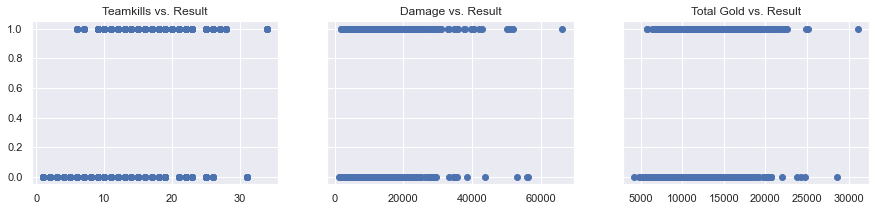

In [26]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_clean['teamkills'],data_clean['result'])
ax1.set_title('Teamkills vs. Result')
ax2.scatter(data_clean['dmgtochamps'],data_clean['result'])
ax2.set_title('Damage vs. Result')
ax3.scatter(data_clean['totalgold'],data_clean['result'])
ax3.set_title('Total Gold vs. Result')
plt.show()

# Declaring dependent and independent variables

In [27]:
data_clean.columns.values

array(['side', 'position', 'player', 'team', 'champion', 'gamelength',
       'result', 'k', 'd', 'a', 'teamkills', 'teamdeaths', 'doubles',
       'triples', 'quadras', 'pentas', 'fb', 'teamdragkills',
       'oppdragkills', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'teamtowerkills', 'opptowerkills', 'fbaron',
       'teambaronkills', 'oppbaronkills', 'dmgtochamps',
       'dmgtochampsperminute', 'dmgshare', 'earnedgoldshare', 'wards',
       'wpm', 'wardshare', 'wardkills', 'visionwardbuys', 'totalgold',
       'minionkills', 'goldat15', 'sum_total', 'win_total', 'lose_total',
       'winrate_total', 'sum_blue_side', 'win_blue_side',
       'lose_blue_side', 'winrate_blue_side', 'sum_red_side',
       'win_red_side', 'lose_red_side', 'winrate_red_side'], dtype=object)

In [36]:
desired_variables = ['teamkills', 'teamdragkills', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'teamtowerkills',
       'teambaronkills', 'dmgtochamps',
       'wpm', 'wardkills', 'goldat15']
y = data_clean['result']
x1 = data_clean[desired_variables]


In [37]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.060688
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 result   No. Observations:                 1143
Model:                          Logit   Df Residuals:                     1129
Method:                           MLE   Df Model:                           13
Date:                Wed, 09 Sep 2020   Pseudo R-squ.:                  0.9124
Time:                        06:57:54   Log-Likelihood:                -69.366
converged:                       True   LL-Null:                       -792.27
Covariance Type:            nonrobust   LLR p-value:                2.076e-301
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -22.6759      4.474     -5.068      0.000     -31.445     -13.907
teamkills         -0.0138      0.045     -0.308      0.758      -0.102       0.074
teamdragkills     -0.5959      0.278     -2.143      0.032      -1.141      -0.051
firedrakes        -0.0105      0.538     -0.020      0.984      -1.066       1.045
waterdrakes       -0.1948      0.625     -0.312      0.755      -1.420       1.031
earthdrakes       -0.7732      0.602     -1.285      0.199      -1.952       0.406
airdrakes          0.1899      0.624      0.304      0.761      -1.034       1.413
elders             0.0298      1.343      0.022      0.982      -2.603       2.662
teamtowerkills     2.9890      0.435      6.873      0.000       2.137       3.841
teambaronkills     4.0488      0.869      4.657      0.000       2.345       5.753
dmgtochamps       -0.0001   3.28e-05     -3.807      0.000      -0.000   -6.05e-05
wpm               -0.7739      0.714     -1.083      0.279      -2.174       0.626
wardkills         -0.0309      0.031     -0.985      0.325      -0.092       0.031
goldat15           0.0004      0.000      1.104      0.270      -0.000       0.001
==================================================================================

Possibly complete quasi-separation: A fraction 0.63 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [39]:
results_log.pred_table()

array([[548.00, 23.00],
       [12.00, 560.00]])

# Interpretation

In [40]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted Defeat','Predicted Victory']
cm_df = cm_df.rename(index={0:'Actual Defeat',1:'Actual Victory'})
cm_df

,Predicted Defeat,Predicted Victory
Actual Defeat,548.0,23.0
Actual Victory,12.0,560.0


In [41]:
cm = np.array(cm_df)
accuracy = ((cm[0,0]+cm[1,1])/cm.sum())*100
accuracy

96.93788276465442

# Conclusion
This logistical regression model has an accuracy of approximately 97% in predicting game result using the chosen independent variables. The results are expected as Baron kills and Towers destroyed correlate greatly to a victory. With Baron, teams are able to siege effectively and overwhelm the opponents. Number of towers destroyed are expected to increase once the base is open. However, there are some variables that have a higher p-value than 0.05, and therefore is insignificant. It is also interesting that the dragon with the highest odds of victory is Air Drake.